# Homework no: 6
### Name : ANGGARA PUTRA PRATAMA - 1101174240 
github.com/anggaraputrapratama

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from skimage.util.shape import view_as_windows
from scipy.signal import find_peaks, peak_prominences
from mpl_toolkits.mplot3d import Axes3D
import pathlib

In [12]:
data = np.loadtxt("1.csv", delimiter=',', skiprows=0, usecols=range(1,5),dtype=(int))
data = np.delete(data, (-1), axis=0)
print(data)

[[1502 2215 2153    1]
 [1667 2072 2047    1]
 [1611 1957 1906    1]
 ...
 [1930 2383 2074    7]
 [1929 2385 2076    7]
 [1926 2385 2078    7]]


In [13]:
ax = data[:,0]
ay = data[:,1]
az = data[:,2]
am = np.sqrt(ax*ax+ay*ay+az*az)

# Use these options determine the way floating point numbers
np.set_printoptions(precision=3, suppress=True)

# Convert am into two dimensional array with reshape to equal with x, y, z
am = am.reshape(-1,1)
print(am.shape)

# Use Stack arrays in sequence horizontally to concate am into data
data1 = np.hstack([data, am])
# Show the data
print (data1)
print (len(data1), data1.shape)

(162500, 1)
[[1502.    2215.    2153.       1.    3434.769]
 [1667.    2072.    2047.       1.    3355.932]
 [1611.    1957.    1906.       1.    3171.436]
 ...
 [1930.    2383.    2074.       7.    3702.035]
 [1929.    2385.    2076.       7.    3703.923]
 [1926.    2385.    2078.       7.    3703.483]]
162500 (162500, 5)


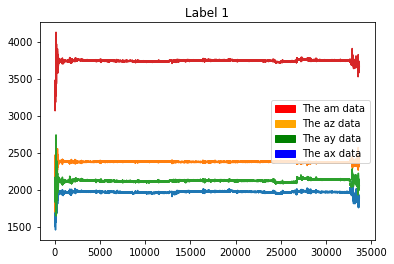

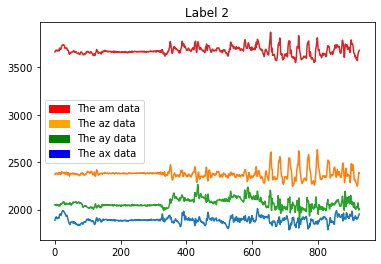

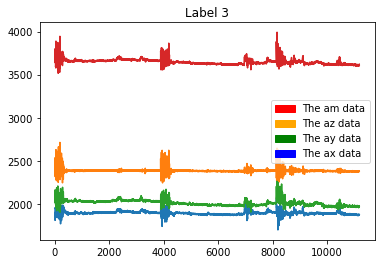

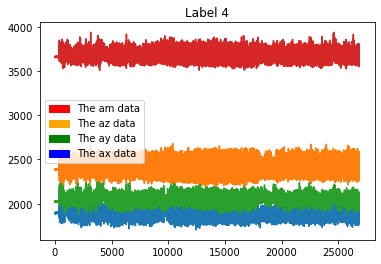

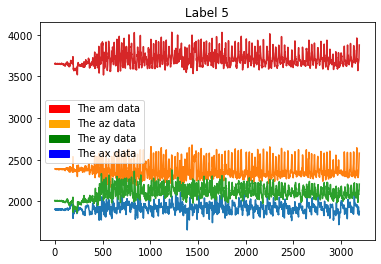

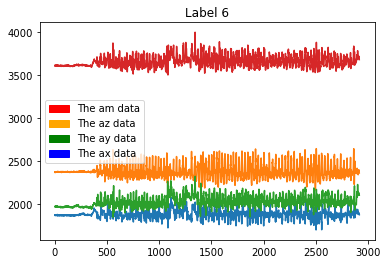

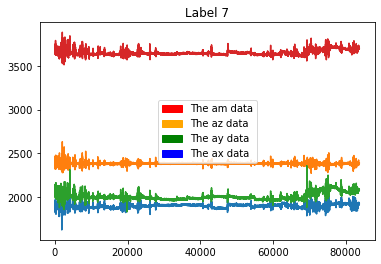

In [14]:
red_patch = mpatches.Patch(color='red', label='The am data')
orange_patch = mpatches.Patch(color='orange', label='The az data')
green_patch = mpatches.Patch(color='green', label='The ay data')
blue_patch = mpatches.Patch(color='blue', label='The ax data')

# Use counter scenario to plot multiple title
counter = 1

for i in range(1,8):
    figure = plt.figure()
    legend = plt.legend(handles=[red_patch,orange_patch,green_patch,blue_patch])
    title = plt.title("Label "+str(counter))
    counter = counter+1
    
    # Use mask to get data from columns 0, 1, 2
    mask1 = data1[:,3] == i
    
    for j in [0,1,2,4]:
        axs = data1[mask1,j]
                
        #plot the figure
        plt.plot(axs)

<ipython-input-15-e1280e63d657>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2, ax3) = plt.subplots(3,1)


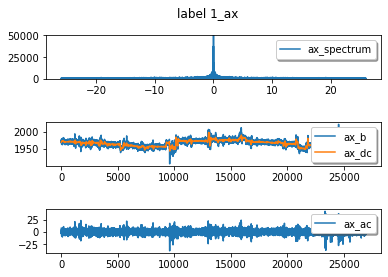

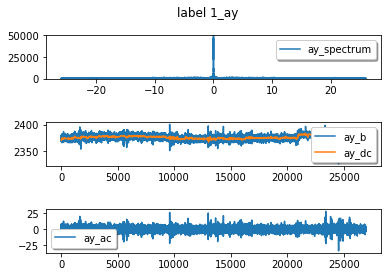

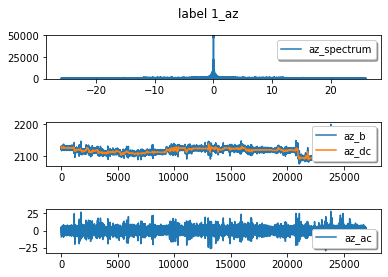

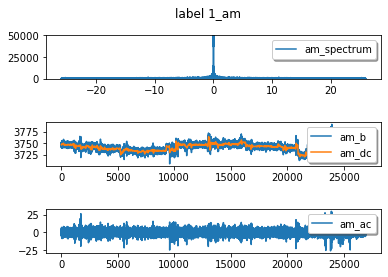

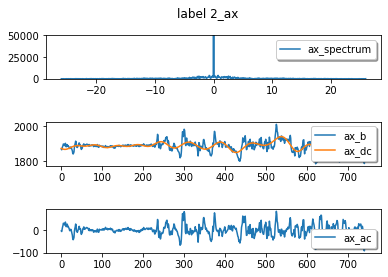

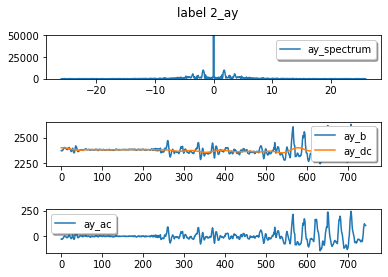

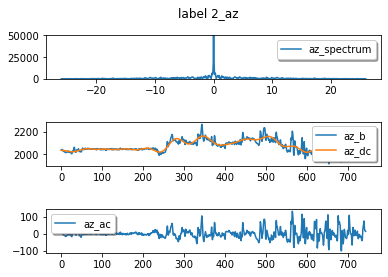

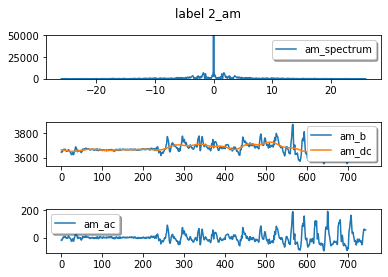

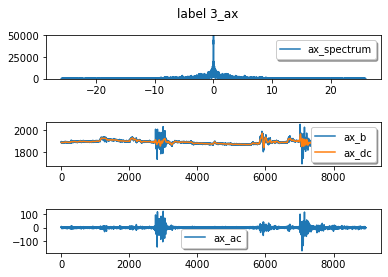

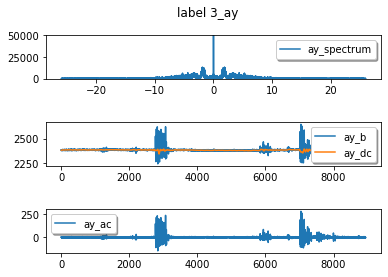

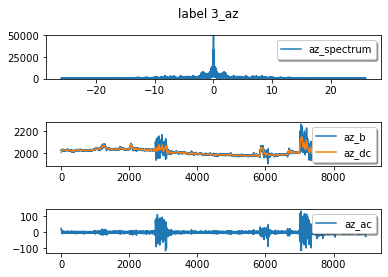

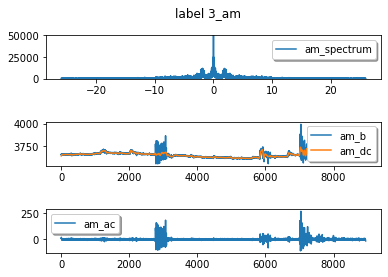

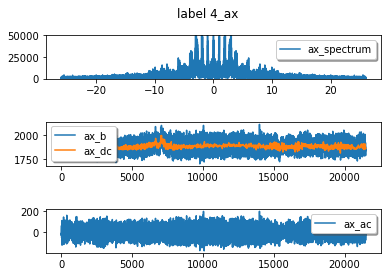

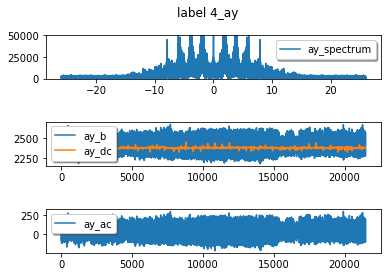

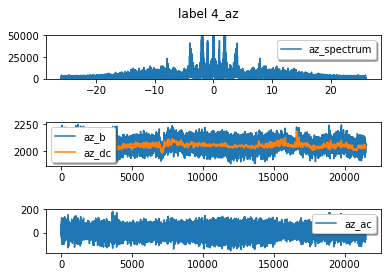

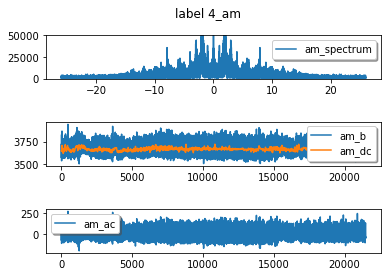

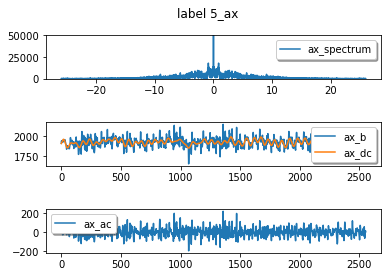

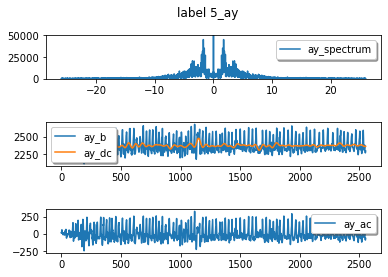

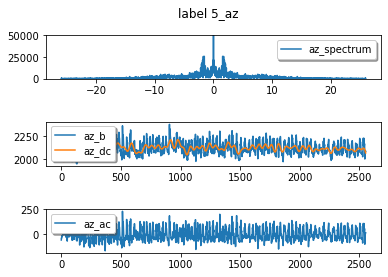

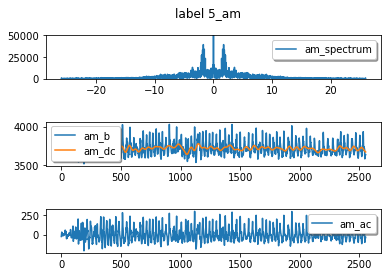

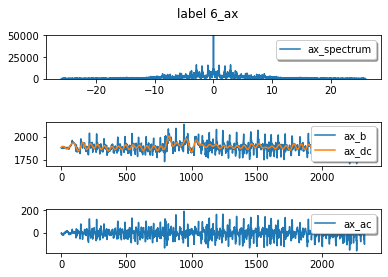

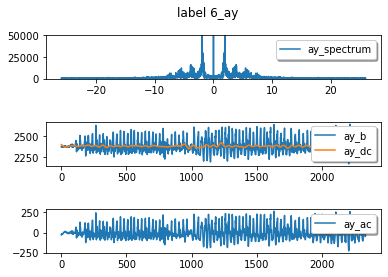

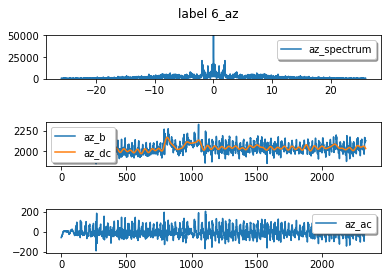

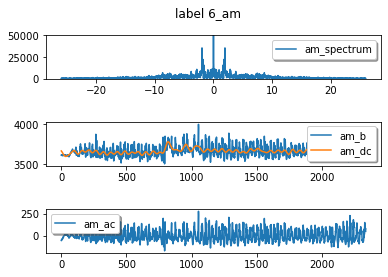

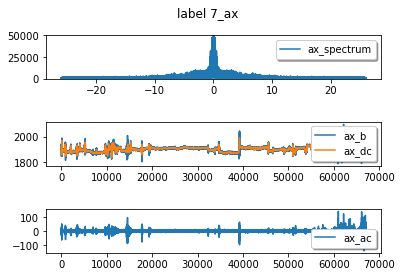

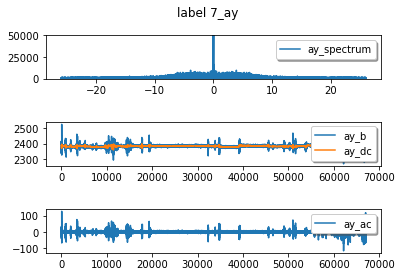

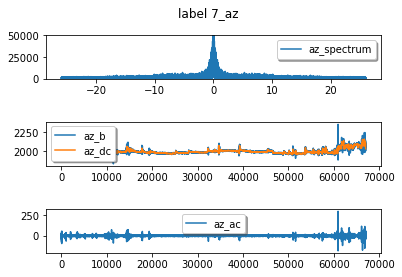

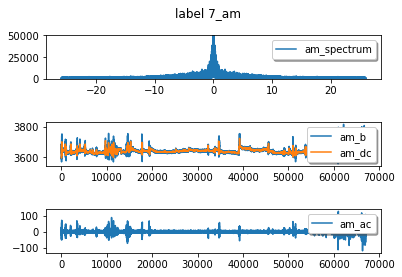

In [15]:
#Given id for each label
axis_label = {0:'ax', 1:'ay', 2:'az', 4:'am'}

#Frequency Sampling
fs = 52

#Use for loop to plot the figure of label 1
for i in range (1,8):
    mask1 = data1[:,3]==i
    #Assign label
    label_list = []
    header = 'ax_b, ax_dc, ax_ac, ay_b, ay_dc, ay_ac, az_b, az_dc, az_ac, am_b, am_dc, am_ac'
    for j in axis_label:
        fig, (ax1, ax2, ax3) = plt.subplots(3,1)
        plt.subplots_adjust(hspace = 1)
        fig.suptitle('label {}_{}'.format(i,axis_label[j]))
        alx = data1[mask1,j]
        
        #Cut off 10% from two ends
        n = len(alx)
        #Use int to define cut off
        cut_len = int(n*0.1)
        b = alx[cut_len:-cut_len]
        m = b.size
        
        #Convert data into frequency domain
        freqY = np.fft.fft(b)
        freq = np.fft.fftfreq(m, d=1/fs)
        shift_freq = np.fft.fftshift(freq)
                
        #Spectrum
        spectrum = np.sqrt(freqY.real**2+freqY.imag**2)               
        shift_spec = np.fft.fftshift(spectrum)
        spec = np.fft.ifft(spectrum)                   
                
        #Low pass filter
        lowPassMask = abs(freq) <=1 #Cut off 1hz
        lowPassFy = freqY.copy()
        lowPassFy[~lowPassMask] = 0 # ~, equivalent to logical_not
        dc = np.fft.ifft(lowPassFy)
        
        #High pass filter
        highPassFy = freqY.copy()
        highPassFy[lowPassMask] = 0 
        ac = np.fft.ifft(highPassFy)
        
        #Reshape b, dc, ac and append to label list 
        label_list.append(b.reshape(-1,1))
        label_list.append(dc.real.reshape(-1,1))
        label_list.append(ac.real.reshape(-1,1))
        
        #Visualize the results               
        ax1.set_ylim(0,50000)
        ax1.plot(shift_freq, shift_spec, label='{}_spectrum'.format(axis_label[j]))
        legend = ax1.legend(loc='best', shadow=True, fontsize='medium')
        
        ax2.plot(b, label='{}_b'.format(axis_label[j]))
        ax2.plot(dc.real, label='{}_dc'.format(axis_label[j]))
        legend = ax2.legend(loc='best', shadow=True, fontsize='medium')
        
        ax3.plot(ac.real, label='{}_ac'.format(axis_label[j]))            
        legend = ax3.legend(loc='best', shadow=True, fontsize='medium')
        
        #Store the results
        arrange_table = np.hstack(label_list)
        np.savetxt(r'/Users/anggaraputrapratama/Documents/Juypter/label/label_{}.csv'.format(i), arrange_table, delimiter=',', fmt='%18f', header=header, comments='')

In [16]:
#Read several dataset in one folder using pathlib and glob
path = 'label/'
data_path = pathlib.Path(path)
data_files = sorted(data_path.glob('label_*.csv'))
#Define function for mean minmax sum calculation
def mean_minmax_sum(Nilai):
    minmax = np.zeros(Nilai.shape[0], dtype=np.float32)
    for i in range(Nilai.shape[0]):
        min_peaks, _ = find_peaks(Nilai[i])
        max_peaks, _ = find_peaks(Nilai[i])
        
        n = min(min_peaks.size, max_peaks.size)
        if n > 0:
            loc_min = Nilai[i, min_peaks[:n]]
            loc_max = Nilai[i, max_peaks[:n]]
            differences = loc_max - loc_min
            average = differences.sum() / n
        else:
            average = np.nan
        minmax[i] = average
    return minmax

#Define function for rms velocity calculation
def rms_velocity(x):
    z = view_as_windows(x, (10), 1)
    v = np.sum(z, axis = 1)
    z = view_as_windows(v, (52,), 26)
    rms = np.sqrt(np.mean(np.square(z), axis = 1))
    return rms

#Calculation process
for j, f in enumerate(data_files):
    print(j, f.name)
    #Use pandas dataframe to read dataset
    df = pd.read_csv(f)
    data2 = df.values
    feature_list = []
    header = ''
    for k in range(12):
        a = data2[:,k]
        b = view_as_windows(a, (52,), 26)
        mean = np.mean(b, axis = 1)
        std = np.std(b, axis = 1)
        minmax = mean_minmax_sum(b)
        rms = rms_velocity(a)
        
        nrows = min(b.shape[0], rms.shape[0], minmax.shape[0])
        feature_list.append(mean[:nrows].reshape(-1,1))
        feature_list.append(std[:nrows].reshape(-1,1))
        feature_list.append(minmax[:nrows].reshape(-1,1))
        feature_list.append(rms[:nrows].reshape(-1,1))
        
        #Store the results
        header += 'mean_(0), std_(0), minmax_(0), rms_(0),'.format(df.columns[k])
        
        arrange = np.hstack(feature_list)
        print(arrange.shape)
        np.savetxt('features/features_{}.csv'.format(j), arrange, delimiter=',', fmt='%18f', header=header, comments='')

0 label_1.csv
(1034, 4)
(1034, 8)
(1034, 12)
(1034, 16)
(1034, 20)
(1034, 24)
(1034, 28)
(1034, 32)
(1034, 36)
(1034, 40)
(1034, 44)
(1034, 48)
1 label_2.csv
(27, 4)
(27, 8)
(27, 12)
(27, 16)
(27, 20)
(27, 24)
(27, 28)
(27, 32)
(27, 36)
(27, 40)
(27, 44)
(27, 48)
2 label_3.csv
(342, 4)
(342, 8)
(342, 12)
(342, 16)
(342, 20)
(342, 24)
(342, 28)
(342, 32)
(342, 36)
(342, 40)
(342, 44)
(342, 48)
3 label_4.csv
(825, 4)
(825, 8)
(825, 12)
(825, 16)
(825, 20)
(825, 24)
(825, 28)
(825, 32)
(825, 36)
(825, 40)
(825, 44)
(825, 48)
4 label_5.csv
(96, 4)
(96, 8)
(96, 12)
(96, 16)
(96, 20)
(96, 24)
(96, 28)
(96, 32)
(96, 36)
(96, 40)
(96, 44)
(96, 48)
5 label_6.csv
(88, 4)
(88, 8)
(88, 12)
(88, 16)
(88, 20)
(88, 24)
(88, 28)
(88, 32)
(88, 36)
(88, 40)
(88, 44)
(88, 48)
6 label_7.csv
(2575, 4)
(2575, 8)
(2575, 12)
(2575, 16)
(2575, 20)
(2575, 24)
(2575, 28)
(2575, 32)
(2575, 36)
(2575, 40)
(2575, 44)
(2575, 48)


0 features_0.csv
(1034, 49)
1 features_1.csv
(27, 49)
2 features_2.csv
(342, 49)
3 features_3.csv
(825, 49)
4 features_4.csv
(96, 49)
5 features_5.csv
(88, 49)
6 features_6.csv
(2575, 49)


Text(0.5, 0, 'Z Label')

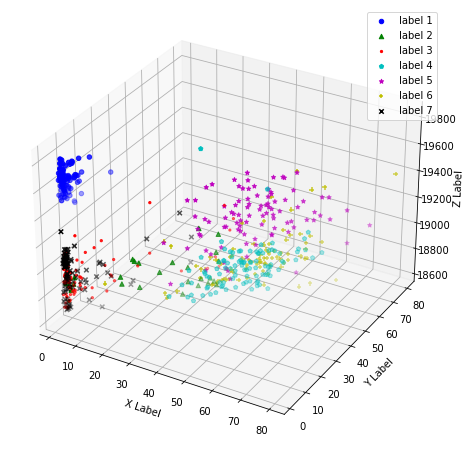

In [17]:
#Read several dataset in one folder using pathlib and glob
path = 'features/'
data_path = pathlib.Path(path)
data_files = sorted(data_path.glob('features_*.csv'))

#Choose 100 points of samples
n = 100
np.random.seed(100)
fea_lst = []

for i, f in enumerate(data_files):
    print(i, f.name)
    df = pd.read_csv(f)
    df.fillna(method='ffill', inplace = True)
    df.fillna(method='bfill', inplace = True)
    print(df.shape)
    data = df.values
    
    idx = np.random.choice(data.shape[0], min(n, data.shape[0]),replace=False)
    arr = data[idx,:]
    fea_lst.append(arr)
    
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = 1
y = 1
z = 3
color = ['b', 'g', 'r','c','m','y','k']
marker = ['o','^', '.','p','*','+','x']

for j in range(len(fea_lst)):
    xs = fea_lst[j][:,x]
    ys = fea_lst[j][:,y]
    zs = fea_lst[j][:,z]
    ax.scatter(xs, ys, zs, c=color[j], marker=marker[j], label='label {}'.format(j+1))
    
ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')